# <center> Machine Learning </center>
## <center> Lab 3 </center>

# Exercises for Pass (G)

## Part 1 - Neural Network implementation

In [1]:
# Time to implement a 1-layered non-regularized neural network.

import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_gradient(z):
    return sigmoid(z) * (1 - sigmoid(z))

def check_gradient(J, theta):
    numgrad = np.zeros_like(theta)
    epsilon = 1e-4

    for i in range(len(numgrad)):
        e = np.zeros_like(theta).flatten()
        e[i] = epsilon
        numgrad[i] = (J(theta + e.reshape(theta.shape)) - J(theta - e.reshape(theta.shape))) / (2 * epsilon)

    return numgrad.flatten()

def init_nn_parameters(numin, numhid, numout):
    r1  = np.sqrt(6) / np.sqrt(numin+numhid+1)
    r2  = np.sqrt(6) / np.sqrt(numin+numout+1)
    W1 = np.random.rand(numhid, numin) * 2 * r1 - r1
    W2 = np.random.rand(numout, numhid) * 2 * r2 - r2
    b1 = np.zeros((numhid, 1))
    b2 = np.zeros((numout, 1))
    theta = np.concatenate([W1.ravel(), W2.ravel(), b1.ravel(), b2.ravel()])
    theta_size = [W1.shape, W2.shape, b1.shape, b2.shape]
    return theta, theta_size

def theta_to_params(theta, theta_size):
    idx_W1_end = np.prod(theta_size[0])
    idx_W2_end = idx_W1_end + np.prod(theta_size[1])
    idx_b1_end = idx_W2_end + np.prod(theta_size[2])
    W1 = theta[:idx_W1_end].reshape(theta_size[0])
    W2 = theta[idx_W1_end:idx_W2_end].reshape(theta_size[1])
    b1 = theta[idx_W2_end:idx_b1_end].reshape(theta_size[2])
    b2 = theta[idx_b1_end:].reshape(theta_size[3])
    return W1, W2, b1, b2

def cost_neural_network(theta, theta_size, X, y):
    m, n = X.shape
    num_classes = len(np.unique(y))
    lambda_ = 0

    W1, W2, b1, b2 = theta_to_params(theta, theta_size) 
    y_mat = np.eye(num_classes)[y.reshape(-1)-1].T
    
    # =============== Your code here ============================
    # Forward propagation
    z2 = np.dot(W1, X) + b1
    a2 = sigmoid(z2)
    z3 = np.dot(W2, a2) + b2
    a3 = sigmoid(z3)

    # Calculate cost J
    J = np.sum(0.5 * np.sum((a3 - y_mat) ** 2))

    # Calculate delta error terms
    delta3 = (a3 - y_mat) * a3 * (1 - a3)
    delta2 = np.dot(W2.T, delta3) * a2 * (1 - a2)

    # Calculate gradients
    gradW2 = np.dot(delta3, a2.T)
    gradW1 = np.dot(delta2, X.T)
    gradb2 = np.sum(delta3, axis=1)
    gradb1 = np.sum(delta2, axis=1)

     # =============================================================
    
    # Unroll gradients
    grad = np.concatenate([gradW1.ravel(), gradW2.ravel(), gradb1.ravel(), gradb2.ravel()])
    
    return J, grad

# Create test data to check gradients
X = np.random.randn(8, 100)
y = np.random.randint(1, 11, size=(1, 100))
print(X.shape,y.shape)

theta, theta_size = init_nn_parameters(8, 5, 10)
print(theta_size)
cost, grad = cost_neural_network(theta, theta_size, X, y[0])  # Adjust indexing here since y[0] gives the 1D array
numGrad = check_gradient(lambda p: cost_neural_network(p, theta_size, X, y[0])[0], theta)  # Adjust indexing here too
diff = np.linalg.norm(numGrad - grad) / np.linalg.norm(numGrad + grad)
print(diff)

(8, 100) (1, 100)
[(5, 8), (10, 5), (5, 1), (10, 1)]
3.165073628544072e-10


## Part 2 - Neural network for handwritten digit classification

In [2]:
import numpy as np
from scipy.io import loadmat
from scipy.optimize import minimize
import scipy.io
import pandas as pd
import numpy as np

def theta_to_params(theta, theta_size):
    idx_W1_end = np.prod(theta_size[0])
    idx_W2_end = idx_W1_end + np.prod(theta_size[1])
    idx_b1_end = idx_W2_end + np.prod(theta_size[2])
    W1 = theta[:idx_W1_end].reshape(theta_size[0])
    W2 = theta[idx_W1_end:idx_W2_end].reshape(theta_size[1])
    b1 = theta[idx_W2_end:idx_b1_end].reshape(theta_size[2])
    b2 = theta[idx_b1_end:].reshape(theta_size[3])
    return W1, W2, b1, b2

def split_data(X, ratios, seed):
    np.random.seed(seed)
    m = X.shape[1]
    indices = np.random.permutation(m)
    train_end = int(ratios[0] * m)
    val_end = train_end + int(ratios[1] * m)
    train_idx = indices[:train_end]
    val_idx = indices[train_end:val_end]
    test_idx = indices[val_end:]
    return X[:, train_idx], X[:, val_idx], X[:, test_idx]

def predict_neural_network(theta, theta_size, X):
    
    W1, W2, b1, b2 = theta_to_params(theta, theta_size) 

    # =============== Your code here ============================
    # Calculate the feedforward of the hidden layer and output layer. 
    # Remember to use the sigmoid function. The output preds is a vector of length m
    # with the predicted class (1-10) for each input example where the predicted
    # class is the argmax of the output layer
    
    z2 = np.dot(W1, X) + b1
    a2 = sigmoid(z2)
    z3 = np.dot(W2, a2) + b2
    a3 = sigmoid(z3)
    
    
    # =============================================================
    return np.argmax(a3, axis=0) + 1

# Load and split data
data = scipy.io.loadmat(r'./../datasets/smallMNIST.mat')
a=data['X']
print(a.shape)
X = data['X'].T
y = data['y'].reshape(-1, 1).T
print(np.unique(y)) # Note that the label vector y starts from 1
Xtrain, Xval, Xtest = split_data(X, [0.6, 0.3, 0.1], 0)
ytrain, yval, ytest = split_data(y, [0.6, 0.3, 0.1], 0)

# Initialize the model
num_vis = X.shape[0]
num_out = len(np.unique(y))
theta, theta_size = init_nn_parameters(num_vis, 50, num_out)

# Train the model
cost_function = lambda p: cost_neural_network(p, theta_size, Xtrain, ytrain)
result = minimize(fun=cost_function, x0=theta, jac=True, method='L-BFGS-B', options={'maxiter': 100, 'disp': True})
optTheta = result.x

# Calculate the predictions of the trained model
ypredtrain = predict_neural_network(optTheta, theta_size, Xtrain)
ypredval = predict_neural_network(optTheta, theta_size, Xval)
ypredtest = predict_neural_network(optTheta, theta_size, Xtest)

# and the accuracies
print('Train Set Accuracy:', np.mean(ypredtrain == ytrain) * 100)
print('Val Set Accuracy:', np.mean(ypredval == yval) * 100)
print('Test Set Accuracy:', np.mean(ypredtest == ytest) * 100)


(5000, 400)
[ 1  2  3  4  5  6  7  8  9 10]
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        20560     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.57057D+03    |proj g|=  3.38764D+02


 This problem is unconstrained.



At iterate    1    f=  1.60593D+03    |proj g|=  8.11629D+01

At iterate    2    f=  1.40476D+03    |proj g|=  2.69524D+01

At iterate    3    f=  1.35700D+03    |proj g|=  9.42081D+00

At iterate    4    f=  1.34608D+03    |proj g|=  4.45356D+00

At iterate    5    f=  1.34226D+03    |proj g|=  3.92513D+00

At iterate    6    f=  1.33704D+03    |proj g|=  4.75438D+00

At iterate    7    f=  1.32050D+03    |proj g|=  9.87330D+00

At iterate    8    f=  1.20963D+03    |proj g|=  2.00337D+01

At iterate    9    f=  1.18295D+03    |proj g|=  5.56320D+01

At iterate   10    f=  9.36538D+02    |proj g|=  5.59308D+01

At iterate   11    f=  8.12597D+02    |proj g|=  2.13916D+01

At iterate   12    f=  7.83722D+02    |proj g|=  1.86567D+01

At iterate   13    f=  7.59697D+02    |proj g|=  2.08649D+01

At iterate   14    f=  7.17880D+02    |proj g|=  1.75096D+01

At iterate   15    f=  6.68016D+02    |proj g|=  3.05300D+01

At iterate   16    f=  6.23556D+02    |proj g|=  1.22986D+01

At iter

## Part 3 - Implement Auto-encoder

In [3]:
# Time to implement a non-regularized auto-encoder.

import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_gradient(z):
    return sigmoid(z) * (1 - sigmoid(z))

def theta_to_params(theta, theta_size):
    idx_W1_end = np.prod(theta_size[0])
    idx_W2_end = idx_W1_end + np.prod(theta_size[1])
    idx_b1_end = idx_W2_end + np.prod(theta_size[2])
    W1 = theta[:idx_W1_end].reshape(theta_size[0])
    W2 = theta[idx_W1_end:idx_W2_end].reshape(theta_size[1])
    b1 = theta[idx_W2_end:idx_b1_end].reshape(theta_size[2])
    b2 = theta[idx_b1_end:].reshape(theta_size[3])
    return W1, W2, b1, b2

def cost_autoencoder(theta, theta_size, X):
    m, n = X.shape

    W1, W2, b1, b2 = theta_to_params(theta, theta_size)  
    
    # We expect the input to be equal to output, we thus use X as the output and input for the training.
    y_mat = X
    
    # =============== Your code here ============================
    # You can copy the code from cost_neural_network and work from there
    z2 = np.dot(W1, X) + b1
    a2 = sigmoid(z2)
    z3 = np.dot(W2, a2) + b2
    a3 = sigmoid(z3)
    
    J = np.sum(0.5 * np.sum((a3 - y_mat) ** 2))
    
    # Calculate delta error terms
    delta3 = (a3 - y_mat) * a3 * (1 - a3)
    delta2 = np.dot(W2.T, delta3) * a2 * (1 - a2)

    # Calculate gradients
    gradW2 = np.dot(delta3, a2.T)
    gradW1 = np.dot(delta2, X.T)
    gradb2 = np.sum(delta3, axis=1)
    gradb1 = np.sum(delta2, axis=1)
    
    # ============================================================
    
    # Unroll gradients
    grad = np.concatenate([gradW1.ravel(), gradW2.ravel(), gradb1.ravel(), gradb2.ravel()])
    
    return J, grad

# Usage for autoencoder
theta, theta_size = init_nn_parameters(8, 5, 8)  # Notice the third parameter is 8 for the autoencoder
X = np.random.randn(8, 100)  # Input data

# Initialize theta and theta_size appropriately before this
cost, grad = cost_autoencoder(theta, theta_size, X)

# Perform gradient checking as before
numGrad = check_gradient(lambda p: cost_autoencoder(p, theta_size, X)[0], theta)

# Compute the relative difference between the gradients
diff = np.linalg.norm(numGrad - grad) / np.linalg.norm(numGrad + grad)

print("Gradient difference:", diff)



Gradient difference: 3.1487349252410814e-10


## Part 4 - Reconsructing with Auto-encoder

In [4]:
def theta_to_params(theta, theta_size):
    idx_W1_end = np.prod(theta_size[0])
    idx_W2_end = idx_W1_end + np.prod(theta_size[1])
    idx_b1_end = idx_W2_end + np.prod(theta_size[2])
    W1 = theta[:idx_W1_end].reshape(theta_size[0])
    W2 = theta[idx_W1_end:idx_W2_end].reshape(theta_size[1])
    b1 = theta[idx_W2_end:idx_b1_end].reshape(theta_size[2])
    b2 = theta[idx_b1_end:].reshape(theta_size[3])
    return W1, W2, b1, b2

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split

data = scipy.io.loadmat(r'./../datasets/smallMNIST.mat')
X = data['X']
print("x shape",X.shape)

Xtrain, Xtemp = train_test_split(X, test_size=0.4, random_state=0)
Xval, Xtest = train_test_split(Xtemp, test_size=0.5, random_state=0)
print("Xtrain shape, Xtemp shape ", Xtrain.shape,Xtemp.shape)

# Decide a value for number of hidden units in the auto-encoder, num_hid,
# and the number of training iterations, num_iter. 
# Try different values until you get good results
num_hid = 35
num_iter = 8000

num_vis = Xtrain.shape[1]
theta, theta_size = init_nn_parameters(num_vis, num_hid, num_vis)
Xtrain = Xtrain.T
print("Xtrain.T shape", Xtrain.shape)

# Train the auto-encoder
cost_function = lambda p: cost_autoencoder(p, theta_size, Xtrain)
# use an optimizing function to get the optimal thetas
result = minimize(fun=cost_function, x0=theta, method='L-BFGS-B', jac=True, options={'maxiter': num_iter, 'disp': False})
opt_theta = result.x

# =============== Your code here ============================
# Feedforward the training data on the trained auto-encoder to get the output layer Xrec.
# You can use the function theta_to_params to get W1, W2, b1, b2 from opt_theta and theta_size

W1, W2, b1, b2 = theta_to_params(opt_theta, theta_size)


z2 = np.dot(W1, Xtrain) + b1
a2 = sigmoid(z2)
z3 = np.dot(W2, a2) + b2
a3 = sigmoid(z3)

Xrec = a3

# ============================================================


# Plot 10x10 images from the original data and the reconstructed data
def display_data(data, title):
    fig, axarr = plt.subplots(10, 10, figsize=(10, 10))
    for i in range(10):
        for j in range(10):
            axarr[i, j].imshow(data[:, i * 10 + j].reshape(20, 20).T, cmap='gray')
            axarr[i, j].axis('off')
    plt.suptitle(title)
    plt.show()

# Display original images
print("Xtrain.T shape emd", Xtrain.shape)
display_data(Xtrain, 'Original input')

# Display reconstructed images
display_data(Xrec, 'Reconstructions')


x shape (5000, 400)
Xtrain shape, Xtemp shape  (3000, 400) (2000, 400)
Xtrain.T shape (400, 3000)


KeyboardInterrupt: 

# Exercises for Pass with distinction (VG)

## Part 5 - Bias-variance analysis on the number of hidden units in a Neural Network

/var/folders/hj/yrzp_6d94g91tf5mbs7ysj_80000gn/T/ipykernel_84020/2494404124.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


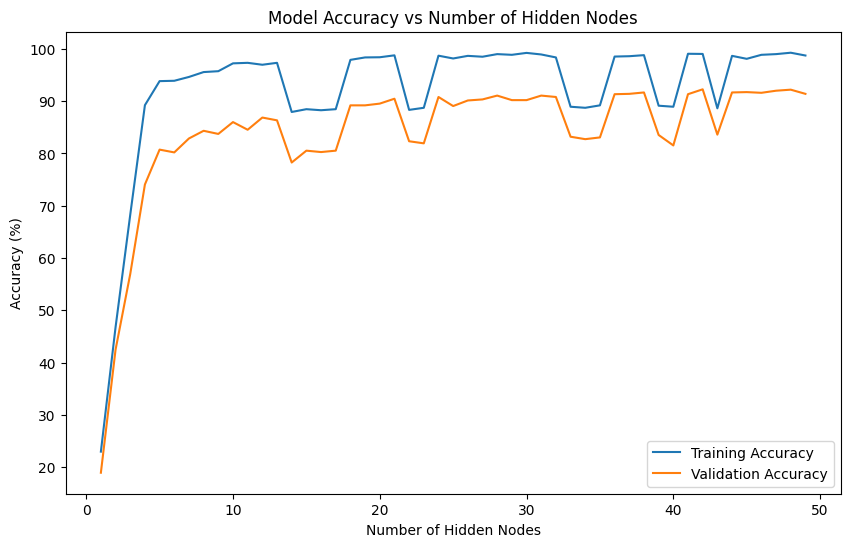

In [10]:
# Perform a bias-variance analysis on the number of
# hidden units in the neural network (numhid) to decide the optimal value. Show the
# bias-variance analysis plot and describe what is the best choice.

import numpy as np
from scipy.io import loadmat
from scipy.optimize import minimize
import scipy.io
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# choose 10 different number for your hidden layer and decide the optimal value throught the plot
numhidlist = range(1, 50, 1) # You can change these values to try different values of numhid

ypredtrain = np.zeros(len(numhidlist))
ypredval = np.zeros(len(numhidlist))
ypredtest = np.zeros(len(numhidlist))

# Load and split data
data = scipy.io.loadmat(r'./../datasets/smallMNIST.mat')
X = data['X'].T
y = data['y'].reshape(-1, 1).T
Xtrain, Xval, Xtest = split_data(X, [0.6, 0.3, 0.1], 0)
ytrain, yval, ytest = split_data(y, [0.6, 0.3, 0.1], 0)

num_vis = Xtrain.shape[0]
num_out = len(np.unique(ytrain))


for i, numhid in enumerate(numhidlist):
    theta, theta_size = init_nn_parameters(num_vis, numhid, num_out)

    cost_function = lambda p: cost_neural_network(p, theta_size, Xtrain, ytrain)

    # =============== Your code here ============================
    # Chose a minimizer function from scipy in order to get the optimal theta
    
    num_iter = 500
    result = minimize(fun=cost_function, x0=theta, method='L-BFGS-B', jac=True, options={'maxiter': num_iter, 'disp': False})
    opt_theta = result.x
    
    # ========================================================

    ypredtrain[i] = np.mean(predict_neural_network(opt_theta, theta_size, Xtrain) == ytrain) * 100
    ypredval[i] = np.mean(predict_neural_network(opt_theta, theta_size, Xval) == yval) * 100
    ypredtest[i] = np.mean(predict_neural_network(opt_theta, theta_size, Xtest) == ytest) * 100


# =============== Your code here ============================
# Plot the results of ypredtrain and ypredval

plt.figure(figsize=(10, 6))

plt.plot(numhidlist, ypredtrain, label='Training Accuracy')
plt.plot(numhidlist, ypredval, label='Validation Accuracy')

plt.title('Model Accuracy vs Number of Hidden Nodes')
plt.xlabel('Number of Hidden Nodes')
plt.ylabel('Accuracy (%)')
plt.legend(loc='best')

plt.show()

# ========================================================

## Part 6 - Implement Softmax

In [1]:
from scipy.io import loadmat
from scipy.optimize import minimize
import scipy.io
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


def softmax(z):
    e_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    h = e_z / e_z.sum(axis=0, keepdims=True)
    return h

def check_gradient(J, theta):
    numgrad = np.zeros_like(theta)
    epsilon = 1e-4

    for i in range(len(numgrad)):
        e = np.zeros_like(theta).flatten()
        e[i] = epsilon
        numgrad[i] = (J(theta + e.reshape(theta.shape)) - J(theta - e.reshape(theta.shape))) / (2 * epsilon)

    return numgrad.flatten()

def init_softmax_parameters(numin, numout):
    theta = np.random.randn(numout, numin)
    theta = theta.ravel()
    return theta

def cost_softmax(theta, X, y, numClasses, lambda_=0):
    m, n = X.shape
    theta = np.reshape(theta, (numClasses, X.shape[0]))    
    y_mat = np.eye(num_classes)[y.reshape(-1)-1].T
    
    # =============== Your code here ============================
    # Calculate the hypothesis h using theta, X, and the function softmax. Use h to calculate J and grad. 
    # Remember to .ravel() the grad just as we did for the cost_neural_network

    h = softmax(np.dot(theta, X))
    # see lecture PDF for this ...
    J = -1.0/m * np.sum(y_mat * np.log(h)) + 0.5 * lambda_ * np.sum(theta * theta)
    d = y_mat - h
    grad = -1.0/m * np.dot(d, X.T) + lambda_ * theta
    return J, grad.ravel()

def predict_softmax(theta, X, numClasses):
    
    # =============== Your code here ============================
    # Use similar as predict_neural_network

    num_inputs, _ = X.shape
    theta = theta.reshape(numClasses, num_inputs)
    
    hx = np.dot(theta, X)
    h = softmax(hx)
    
    return np.argmax(h, axis=0) + 1


# Create test data to check gradients

num_classes = 10 # 10
num_inputs = 5 # 5 
num_samples = 20 # 20
X = np.random.randn(num_inputs, num_samples)
y = np.random.randint(1, num_classes+1, size=(1, num_samples))
print(X.shape,y.shape)


theta = init_softmax_parameters(num_inputs, num_classes)
cost, grad = cost_softmax(theta, X, y[0], num_classes)  # Adjust indexing here since y[0] gives the 1D array
numGrad = check_gradient(lambda p: cost_softmax(p, X, y[0], num_classes)[0], theta)  # Adjust indexing here too
diff = np.linalg.norm(numGrad - grad) / np.linalg.norm(numGrad + grad)
print('diff:', diff)


# =============== Your code here ============================
# Use the softmax on the raw MNISTsmall dataset

def split_data(X, ratios, seed):
    np.random.seed(seed)
    m = X.shape[1]
    indices = np.random.permutation(m)
    train_end = int(ratios[0] * m)
    val_end = train_end + int(ratios[1] * m)
    train_idx = indices[:train_end]
    val_idx = indices[train_end:val_end]
    test_idx = indices[val_end:]
    return X[:, train_idx], X[:, val_idx], X[:, test_idx]

data = scipy.io.loadmat(r'./../datasets/smallMNIST.mat')
X = data['X'].T
y = data['y'].reshape(-1, 1).T
print(X.shape,y.shape)

Xtrain, Xval, Xtest = split_data(X, [0.6, 0.3, 0.1], 0)
ytrain, yval, ytest = split_data(y, [0.6, 0.3, 0.1], 0)

num_classes = len(np.unique(y))
num_inputs = Xtrain.shape[0]

theta = init_softmax_parameters(num_inputs, num_classes)

print(Xtrain.shape,ytrain.shape)

num_iter = 1000
print("Training softmax classifier with raw image data for", num_iter, 'iterations')
cost_function = lambda p: cost_softmax(p, Xtrain, ytrain[0], num_classes)
result = minimize(fun=cost_function, x0=theta, method='L-BFGS-B', jac=True, options={'maxiter': num_iter, 'disp': False})

opt_theta = result.x

y_pred = predict_softmax(opt_theta, Xtest, num_classes)
ytest_flat = ytest.ravel()
accuracy = np.mean(y_pred == ytest_flat) * 100

print('Test set accuracy (using raw image data):', accuracy, '%')


# =============================================================


# =============== Your code here ============================
# Use the softmax on the trained auto-encoder hidden layer

def init_nn_parameters(numin, numhid, numout):
    r1  = np.sqrt(6) / np.sqrt(numin+numhid+1)
    r2  = np.sqrt(6) / np.sqrt(numin+numout+1)
    W1 = np.random.rand(numhid, numin) * 2 * r1 - r1
    W2 = np.random.rand(numout, numhid) * 2 * r2 - r2
    b1 = np.zeros((numhid, 1))
    b2 = np.zeros((numout, 1))
    theta = np.concatenate([W1.ravel(), W2.ravel(), b1.ravel(), b2.ravel()])
    theta_size = [W1.shape, W2.shape, b1.shape, b2.shape]
    return theta, theta_size

def theta_to_params(theta, theta_size):
    idx_W1_end = np.prod(theta_size[0])
    idx_W2_end = idx_W1_end + np.prod(theta_size[1])
    idx_b1_end = idx_W2_end + np.prod(theta_size[2])
    W1 = theta[:idx_W1_end].reshape(theta_size[0])
    W2 = theta[idx_W1_end:idx_W2_end].reshape(theta_size[1])
    b1 = theta[idx_W2_end:idx_b1_end].reshape(theta_size[2])
    b2 = theta[idx_b1_end:].reshape(theta_size[3])
    return W1, W2, b1, b2

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_autoencoder(theta, theta_size, X):
    m, n = X.shape

    W1, W2, b1, b2 = theta_to_params(theta, theta_size)  
    
    y_mat = X
    
    z2 = np.dot(W1, X) + b1
    a2 = sigmoid(z2)
    z3 = np.dot(W2, a2) + b2
    a3 = sigmoid(z3)
    
    J = np.sum(0.5 * np.sum((a3 - y_mat) ** 2))
    
    delta3 = (a3 - y_mat) * a3 * (1 - a3)
    delta2 = np.dot(W2.T, delta3) * a2 * (1 - a2)

    gradW2 = np.dot(delta3, a2.T)
    gradW1 = np.dot(delta2, X.T)
    gradb2 = np.sum(delta3, axis=1)
    gradb1 = np.sum(delta2, axis=1)
    
    grad = np.concatenate([gradW1.ravel(), gradW2.ravel(), gradb1.ravel(), gradb2.ravel()])
    
    return J, grad

num_hid = 35
num_iter = 1000
print('Training auto encoder with ', num_hid, 'hidden units and ', num_iter, 'iterations')

num_vis = Xtrain.shape[0]
theta, theta_size = init_nn_parameters(num_vis, num_hid, num_vis)
#Xtrain = Xtrain.T
print("Xtrain.T shape", Xtrain.shape)

# Train the auto-encoder
cost_function = lambda p: cost_autoencoder(p, theta_size, Xtrain)
# use an optimizing function to get the optimal thetas
result = minimize(fun=cost_function, x0=theta, method='L-BFGS-B', jac=True, options={'maxiter': num_iter, 'disp': False})

opt_theta = result.x

# Use the encoder part of the trained auto-encoder to feed-forward the training and test set to get the activations of the hidden layer. (Using W1, b1)
W1, _, b1, _ = theta_to_params(opt_theta, theta_size)
z2 = np.dot(W1, Xtrain) + b1
a2 = sigmoid(z2)

print(a2.shape)

# Train the softmax with hidden layer from auto encoder

Xtrain = a2 # the new Xtrain is the activations from the auto encoder hidden layer

num_inputs = Xtrain.shape[0]
theta = init_softmax_parameters(num_inputs, num_classes)

print(Xtrain.shape,ytrain.shape)

num_iter = 1000
print('Training softmax classifier with ', num_iter, 'iterations')
cost_function = lambda p: cost_softmax(p, Xtrain, ytrain[0], num_classes)
result = minimize(fun=cost_function, x0=theta, method='L-BFGS-B', jac=True, options={'maxiter': num_iter, 'disp': False})

opt_theta = result.x

z2_test = np.dot(W1, Xtest) + b1
Xtest_encode = sigmoid(z2_test)

y_pred = predict_softmax(opt_theta, Xtest_encode, num_classes)
ytest_flat = ytest.ravel()
accuracy = np.mean(y_pred == ytest_flat) * 100

print('Test set accuracy (using intermediary autoencoder):', accuracy, '%')

# =============================================================



(5, 20) (1, 20)
(400, 5000) (1, 5000)
(400, 3000) (1, 3000)
Training softmax classifier with raw image data for 10000 iterations
Test set accuracy (using raw image data): 86.4 %
Training auto encoder with  20 hidden units and  10000 iterations
Xtrain.T shape (400, 3000)
(20, 3000)
(20, 3000) (1, 3000)
Training softmax classifier with  10000 iterations
Test set accuracy (using intermediary autoencoder): 87.2 %


## Part 7 - PyTorch MNIST Classification Tutorial

/Users/johanlind/PycharmProjects/MLLab1/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Finished Training
Accuracy of the network on the 10000 test images: 96%
GroundTruth:  6 7 4 7 6 2 9 5 4 4
  Predicted:  6 7 4 7 6 2 9 5 4 4


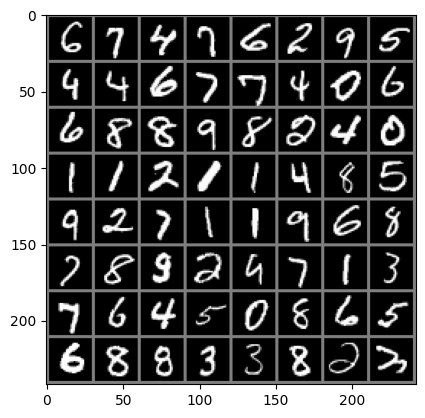

In [1]:
# PyTorch MNIST Classification Tutorial

import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


# We apply a transform to normalize the data.
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = torchvision.datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = torchvision.datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

# Create your own neural network now
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # =============== Your code here ============================
        # Define your layers here with nn.Linear (optional: Try nn.Conv2d for a CNN)
        
        self.layer1 = nn.Linear(28*28, 35)
        self.layer2 = nn.Linear(35, 10)
        
        # ========================================================
        
    def forward(self, x):
        x = x.view(-1, 28 * 28) # Flatten the image
        
        # =============== Your code here ==========================
        # Choose the activations functions here for example torch.sigmoid or torch.relu 
        # and use the previously defined layers above

        x = torch.sigmoid(self.layer1(x))
        x = self.layer2(x)

        # ========================================================
        return x

net = Net()

#  Choose your loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
epochs = 15 #choose a number of epochs

for epoch in range(epochs):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

print('Finished Training')

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total}%')
# Optional: Visualize some predictions
# This will display images along with predicted and true labels.
import numpy as np
dataiter = iter(testloader)
images, labels = next(dataiter)

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Convert from Tensor image

# Show images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{labels[j].item()}' for j in range(10)))

# Get predictions
outputs = net(images.view(-1, 28*28))  # Reshape images to match the input shape of the network
_, predicted = torch.max(outputs, 1)

print('  Predicted: ', ' '.join(f'{predicted[j].item()}'
                              for j in range(10)))
